<a href="https://colab.research.google.com/github/Meghashyamt/Telecom-Project/blob/master/Telecom_Project_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!git clone https://github.com/Meghashyamt/Telecom-Project.git
  

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout




In [0]:
data = pd.read_csv("telecom_churn_data.csv")

In [0]:
#data.loc[0]=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day calls','Day charge','Eve Mins','Eve calls','Eve Charge','Night Mins','Night calls','Night charge','International Mins','International calls','International charge','Custserve calls','Churn']

In [54]:
data.head()

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
Vmail plan              4617 non-null object
Vmail Message           4617 non-null int64
Day mins                4617 non-null float64
Day calls               4617 non-null int64
Day charge              4617 non-null float64
Eve mins                4617 non-null float64
Eve calls               4617 non-null int64
Eve charge              4617 non-null float64
Night mins              4617 non-null float64
Night calls             4617 non-null int64
Night charge            4617 non-null float64
International mins      4617 non-null float64
International calls     4617 non-null int64
International charge    4617 non-null float64
Custserve calls         4617 non-null

In [0]:
data['Churn-Flag']=(data['Churn']== True).astype(int)

In [57]:
data.head(2)

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn,Churn-Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X=data.iloc[:,4:-2]
y=data.iloc[:,-1]

In [0]:
X=pd.get_dummies(X)

In [0]:
#X.head()

In [0]:
y=pd.get_dummies(y)

In [63]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [0]:
clf = Sequential()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [0]:
sc = StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
clf.add(Dense(units=6, activation='relu', input_dim=18))
clf.add(Dense(units=6, activation='relu'))
clf.add(Dense(units= 1, activation='sigmoid'))

In [0]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
m=clf.fit(X_train,y_train, batch_size=32, epochs=100, validation_split=0.1)


Train on 3323 samples, validate on 370 samples
Epoch 1/100
3323/3323 [==============================] - 0s 44us/step - loss: 1.0819e-06 - acc: 1.0000 - val_loss: 1.8048e-06 - val_acc: 1.0000
Epoch 2/100
3323/3323 [==============================] - 0s 61us/step - loss: 1.0225e-06 - acc: 1.0000 - val_loss: 1.7083e-06 - val_acc: 1.0000
Epoch 3/100
3323/3323 [==============================] - 0s 56us/step - loss: 9.6586e-07 - acc: 1.0000 - val_loss: 1.6244e-06 - val_acc: 1.0000
Epoch 4/100
3323/3323 [==============================] - 0s 47us/step - loss: 9.1370e-07 - acc: 1.0000 - val_loss: 1.5390e-06 - val_acc: 1.0000
Epoch 5/100
3323/3323 [==============================] - 0s 37us/step - loss: 8.6478e-07 - acc: 1.0000 - val_loss: 1.4608e-06 - val_acc: 1.0000
Epoch 6/100
3323/3323 [==============================] - 0s 36us/step - loss: 8.1840e-07 - acc: 1.0000 - val_loss: 1.3829e-06 - val_acc: 1.0000
Epoch 7/100
3323/3323 [==============================] - 0s 40us/step - loss: 7.7463e-07 

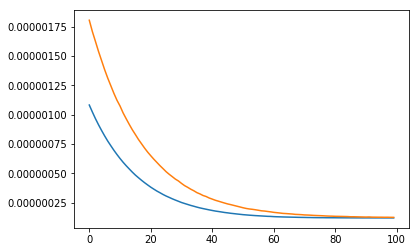

In [73]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

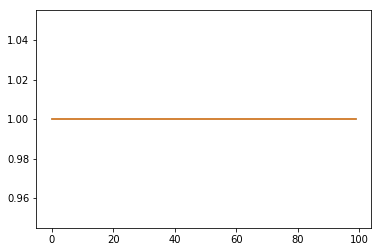

In [74]:

plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])

In [75]:
score= clf.evaluate(X_test, y_test)


924/924 [==============================] - 0s 28us/step


In [76]:
score

[1.2088652063399714e-07, 1.0]

In [77]:
sum(y_train == 0)


0

In [78]:
sum(y_test == 1)


0